Fuzzy Logic Kelompok 5 Kelas IF 43 03

Restu Aditya Rachman 			(1301190433)

Muhamad Hasbi Ashshiddiqi		(1301190476) 

Muhammad Rizqi Ramadhan 		(1301193325)

In [ ]:
!gdown --id 1jAUy_KgQxuSYRxoOzvl_ywZBZRTFRwSC

Downloading...
From: https://drive.google.com/uc?id=1jAUy_KgQxuSYRxoOzvl_ywZBZRTFRwSC
To: /content/restoran.xlsx
100% 10.5k/10.5k [00:00<00:00, 22.0MB/s]


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('restoran.xlsx')

df

,id,pelayanan,makanan
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
...,...,...,...
95,96,30,1
96,97,25,3
97,98,27,10
98,99,8,6


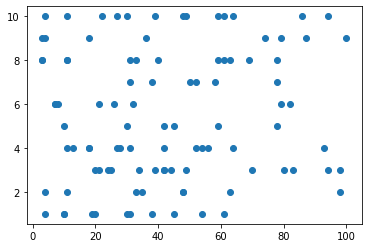

In [ ]:
plt.scatter(df.pelayanan, df.makanan)

In [ ]:
def beta(x,c,b):
  return 1/(1+ abs((x-c)/b)**2)

def plot_linguistik(titik, warna, label, min, max):
  x = np.arange(min, max, 0.1)
  y = beta(x,titik[0],titik[1])
  plt.plot(x,y, color=warna, label=label)

def plot_membership(membership, min, max):
  warna = ['r','g','b','c']

  i = 0
  for ling in membership:
    plot_linguistik(membership[ling], warna[i], ling, min, max)
    i += 1
  plt.legend(loc=3)
  plt.show()

In [ ]:
pelayanan = {
    'low' : [0, 20],
    'avg' : [50, 20],
    'high': [100, 15]
}

makanan = {
    'low' : [0,2],
    'avg' : [4,2],
    'high': [10,2]
}

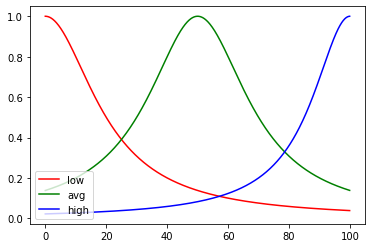

In [ ]:
plot_membership(pelayanan, min = 0, max = 100)

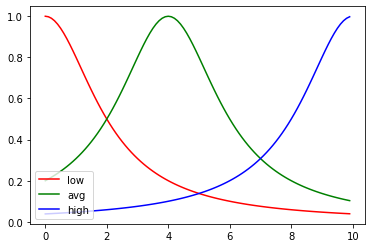

In [ ]:
plot_membership(makanan, min = 0, max = 10)

In [ ]:
def fuzzy_linguistik(x, titik):
  return beta(x,titik[0],titik[1])

def fuzzy_membership(x, membership):
  hasil = {}

  for ling in membership:
    hasil[ling] = fuzzy_linguistik(x, membership[ling])

  return hasil

def fuzzyfikasi(x, list_membership):
  hasil = []
  for i in range(len(list_membership)):
    hasil.append(fuzzy_membership(x[i], list_membership[i]))

  return hasil

In [ ]:
x_fuzzy = fuzzyfikasi([80, 7], [pelayanan, makanan])
x_fuzzy

[{'avg': 0.3076923076923077, 'high': 0.36, 'low': 0.058823529411764705},
 {'avg': 0.3076923076923077,
  'high': 0.3076923076923077,
  'low': 0.07547169811320754}]

In [ ]:
rule = {
    ('high', 'low')   : 'reject',
    ('high', 'avg')   : 'consider',
    ('high', 'high')  : 'accept',
    ('avg', 'low')   : 'reject',
    ('avg', 'avg')   : 'consider',
    ('avg', 'high')  : 'consider',
    ('low', 'low')  : 'reject',
    ('low', 'avg')  : 'reject',
    ('low', 'high') : 'reject',
}

In [ ]:
def inferensi(x_fuzzy, rule):
  hasil = {}
  for l1, v1 in x_fuzzy[0].items():
    for l2, v2 in x_fuzzy[1].items():

      r, min_value = (l1, l2), min(v1, v2)

      current_value = hasil.get(rule[r], 0)
      hasil[rule[r]] = max(min_value, current_value)
  return hasil

In [ ]:
x_infer = inferensi(x_fuzzy, rule)
x_infer

{'accept': 0.3076923076923077,
 'consider': 0.3076923076923077,
 'reject': 0.07547169811320754}

In [ ]:
def defuzz_sugeno(x_infer, membership):
  num, den = 0, 0

  for ling in membership:
    num += x_infer[ling] * membership[ling]
    den += x_infer[ling]

  return num / den

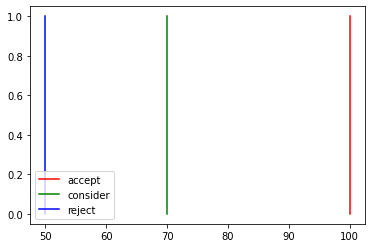

In [ ]:
accept_sugeno = {'accept':100, 'consider':70, 'reject':50}

# plot membership sugeno
colors = 'rgb'
for key, val in accept_sugeno.items():
  plt.plot([val, val], [0,1], colors[0], label = key)
  colors = colors[1:]
plt.legend(loc=3)

In [ ]:
defuzz_sugeno(x_infer, accept_sugeno)

81.17647058823529

In [ ]:
skor = []
for x in df.drop('id', axis=1).values:
  x_fuzzy = fuzzyfikasi(x, [pelayanan, makanan])
  x_infer = inferensi(x_fuzzy, rule)
  x_defuz = defuzz_sugeno(x_infer, accept_sugeno)
  skor.append(x_defuz)

df['Skor'] = skor

In [ ]:
sortdf = df.sort_values(by='Skor', ascending=False)
sortdf

,id,pelayanan,makanan,Skor
23,24,100,9,93.410214
41,42,94,10,93.217208
78,79,87,9,89.032958
68,69,86,10,88.265702
21,22,79,9,82.396746
...,...,...,...,...
10,11,10,5,55.210526
34,35,4,1,54.447696
65,66,4,9,54.447696
17,18,3,9,54.335187


In [ ]:
df_restoran_terbaik = sortdf[:10]
df_lainya = df.drop(df_restoran_terbaik.index)

df_restoran_terbaik

,id,pelayanan,makanan,Skor
23,24,100,9,93.410214
41,42,94,10,93.217208
78,79,87,9,89.032958
68,69,86,10,88.265702
21,22,79,9,82.396746
69,70,78,8,81.559376
62,63,78,7,81.176471
30,31,74,9,78.424869
59,60,79,6,76.271186
15,16,82,6,75.635104


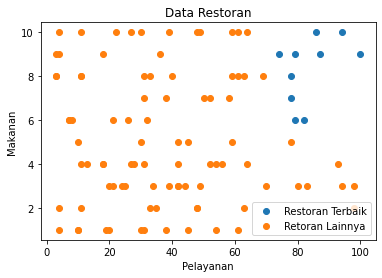

In [ ]:
plt.scatter(df_restoran_terbaik.pelayanan,
            df_restoran_terbaik.makanan,
            label = 'Restoran Terbaik')

plt.scatter(df_lainya.pelayanan,
            df_lainya.makanan,
            label='Retoran Lainnya')
plt.xlabel('Pelayanan')
plt.ylabel('Makanan')
plt.title('Data Restoran')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# menyimpan data ke dalam excel
writer = pd.ExcelWriter('output.xlsx')
# write dataframe to excel
df.sort_values(by='Skor', ascending=False).to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.
